In [33]:
from collections import namedtuple
from jax import random

from traps import *
import numpy as np

figpath = '/home/idnm/Dropbox/hep/Sheets/Quantum Computing/Talks/Variational_synthesis/figures/'

# Success ratios for self instances and random unitaries

In [2]:
n=4 #num qubits
   
cz_self = Experiment.load(f'results/experiment_cz_self_instance_{n}q')
cz_unitary = Experiment.load(f'results/experiment_cz_random_unitary_{n}q')
cp_self = Experiment.load(f'results/experiment_cp_self_instance_{n}q')
cp_unitary = Experiment.load(f'results/experiment_cp_random_unitary_{n}q')

cz_self.plot_success_ratios(maketitle=False, label='cz_random_self')
cz_unitary.plot_success_ratios(maketitle=False, label='cz_random_unitary', xshift=0.5)
plt.legend();
plt.title('CZ')
plt.savefig(figpath+f'SR_cz_{n}q.png')
plt.close()

cp_self.plot_success_ratios(maketitle=False, label='cp_random_self')
cp_unitary.plot_success_ratios(maketitle=False, label='cp_random_unitary', xshift=0.5)
plt.legend();
plt.title('CP')
plt.savefig(figpath+f'SR_cp_{n}q.png', )
plt.close()

cz_unitary.plot_success_ratios(maketitle=False, label='cz_random_unitary')
cp_unitary.plot_success_ratios(maketitle=False, label='cp_random_unitary', xshift=0.5)
plt.legend();
plt.title('CZ vs CP for random unitaries')

plt.savefig(figpath+f'SR_cz_cp_{n}q.png')
plt.close()

# Loss histogram

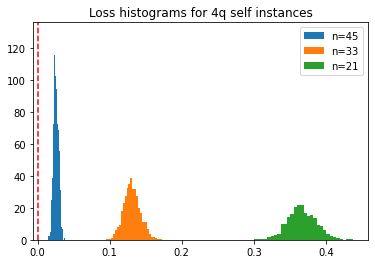

In [3]:
experiment = Experiment.load(f'results/experiment_cz_self_instance_4q')

for n in [45, 33, 21]:
    losses = np.array(experiment.results[n, 0].all_best_losses)
    plt.hist(losses, bins=30, label=f'n={n}', density=True);

plt.axvline(linestyle='--', color='red')
plt.legend();
plt.title('Loss histograms for 4q self instances');
plt.savefig(f'/home/idnm/Dropbox/hep/Sheets/Quantum Computing/Talks/Variational_synthesis/figures/loss_hist.png')
plt.show()

# Success ratio identity

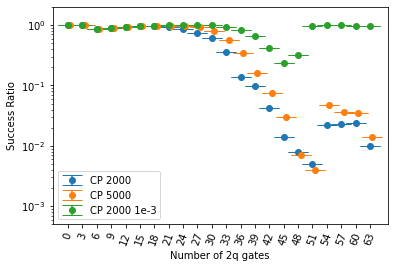

In [7]:
exp_2000 = Experiment.load(f'results/experiment_cp_identity_4q')
exp_5000 = Experiment.load(f'results/experiment_cp_id_4q_5000gd')

exp_2000.plot_success_ratios(maketitle=False, label='CP 2000');
exp_5000.plot_success_ratios(maketitle=False, label='CP 5000', xshift=0.5);
exp_2000.plot_success_ratios(maketitle=False, label='CP 2000 1e-3', min_loss=1e-3);
plt.ylim(top=2)
plt.ylim(bottom=0.5*1e-3)
plt.legend();

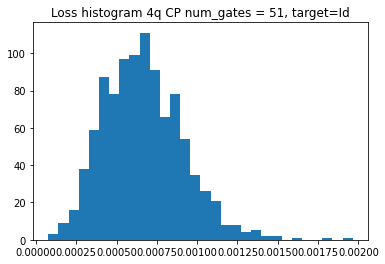

In [32]:
num_gates = 51
plt.hist(np.array(cp_identity.results[num_gates, 0].all_best_losses), bins=30);
plt.title(f'Loss histogram 4q CP num_gates = {num_gates}, target=Id');
plt.savefig(figpath+'id_loss_hist')

# Intermediate complexity

In [24]:
cp_identity = Experiment.load(f'results/experiment_cp_identity_4q')
complexity_15 = Experiment.load('results/experiment_cp_complexity15_4q')
complexity_20 = Experiment.load('results/experiment_cp_complexity20_4q')
complexity_30 = Experiment.load('results/experiment_cp_complexity30_4q')
complexity_45 = Experiment.load('results/experiment_cp_complexity45_4q')
cp_random_unitary = Experiment.load(f'results/experiment_cp_random_unitary_4q')

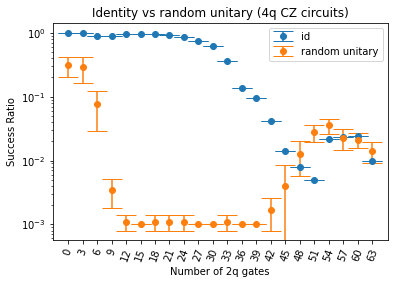

In [25]:
min_loss = 'empiric'

cp_identity.plot_success_ratios(label='id', min_loss=min_loss, maketitle=False)
cp_random_unitary.plot_success_ratios(label='random unitary', min_loss=min_loss, maketitle=False)
plt.title('Identity vs random unitary (4q CZ circuits)')

plt.legend();
plt.savefig(figpath+'id_vs_rnd');

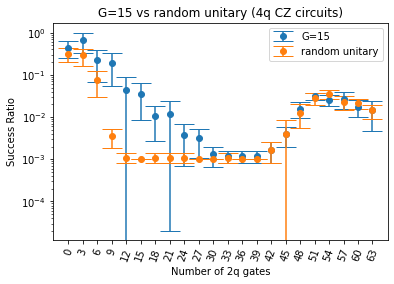

In [27]:
min_loss = 'empiric'

G = 15

complexity_15.plot_success_ratios(label=f'G={G}', min_loss=min_loss, maketitle=False)
cp_random_unitary.plot_success_ratios(label='random unitary', min_loss=min_loss, maketitle=False)
plt.title(f'G={G} vs random unitary (4q CZ circuits)')

plt.legend();
plt.savefig(figpath+f'{G}_vs_rnd');

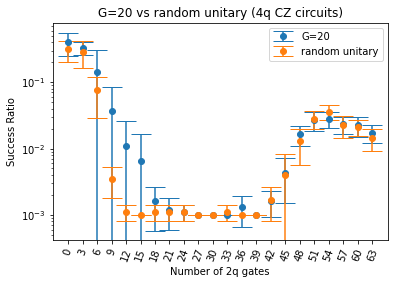

In [28]:
min_loss = 'empiric'

G = 20

complexity_20.plot_success_ratios(label=f'G={G}', min_loss=min_loss, maketitle=False)
cp_random_unitary.plot_success_ratios(label='random unitary', min_loss=min_loss, maketitle=False)
plt.title(f'G={G} vs random unitary (4q CZ circuits)')

plt.legend();
plt.savefig(figpath+f'{G}_vs_rnd');

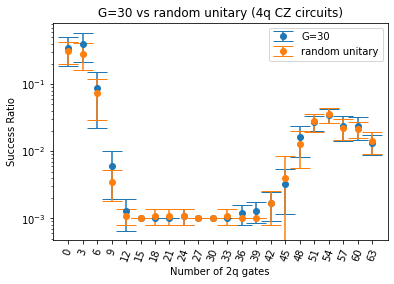

In [29]:
min_loss = 'empiric'

G = 30

complexity_30.plot_success_ratios(label=f'G={G}', min_loss=min_loss, maketitle=False)
cp_random_unitary.plot_success_ratios(label='random unitary', min_loss=min_loss, maketitle=False)
plt.title(f'G={G} vs random unitary (4q CZ circuits)')

plt.legend();
plt.savefig(figpath+f'{G}_vs_rnd');